In [61]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [2]:
file = 'datasets/africa_food_prices.csv'
food = pd.read_csv(file)
food.head()
# The dataset was loaded here.

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN


## Functional Exploration

In [3]:
food.info()
# Information about the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          956779 non-null  int64  
 1   country_id          956779 non-null  float64
 2   country             956779 non-null  object 
 3   state_id            956779 non-null  int64  
 4   state               830101 non-null  object 
 5   market_id           956779 non-null  int64  
 6   market              956779 non-null  object 
 7   produce_id          956779 non-null  int64  
 8   produce             956779 non-null  object 
 9   currency_id         956779 non-null  float64
 10  currency            956779 non-null  object 
 11  pt_id               956779 non-null  int64  
 12  market_type         956779 non-null  object 
 13  um_unit_id          956779 non-null  int64  
 14  quantity            956779 non-null  object 
 15  month               956779 non-nul

In [4]:
food.isna().sum()
# checked if they are any null values.

Unnamed: 0                 0
country_id                 0
country                    0
state_id                   0
state                 126678
market_id                  0
market                     0
produce_id                 0
produce                    0
currency_id                0
currency                   0
pt_id                      0
market_type                0
um_unit_id                 0
quantity                   0
month                      0
year                       0
price                      0
mp_commoditysource    956779
dtype: int64

In [5]:
food.head()

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN


In [6]:
food.drop(columns=["Unnamed: 0","country_id","state_id","market_id",
                   "produce_id","currency_id","pt_id",
                   "mp_commoditysource","quantity"],
        inplace = True)

# dropped all the columns that were not need.

In [7]:
food.rename({'um_unit_id':'goods_purchased'}, axis=1, inplace=True)

# Renamed the col "um_unit_id" with "goods_purchased"

In [8]:
food.rename({'state':'locality'}, axis=1, inplace=True)
# Renamed the col "state" with "locality"

In [9]:
food.locality.fillna("Ikeja", inplace=True)

# Filled all the NAN values with "Ikeja"

In [10]:
food.dtypes

country             object
locality            object
market              object
produce             object
currency            object
market_type         object
goods_purchased      int64
month                int64
year                 int64
price              float64
dtype: object

In [11]:
food.isnull().sum()

# Checked if they were any null values left.

country            0
locality           0
market             0
produce            0
currency           0
market_type        0
goods_purchased    0
month              0
year               0
price              0
dtype: int64

In [12]:
food.shape

(956779, 10)

In [13]:
food.columns

Index(['country', 'locality', 'market', 'produce', 'currency', 'market_type',
       'goods_purchased', 'month', 'year', 'price'],
      dtype='object')

In [14]:
food.describe(include='object')

,country,locality,market,produce,currency,market_type
count,956779,956779,956779,956779,956779,956779
unique,42,312,1696,457,34,3
top,Rwanda,Ikeja,Serrekunda,Millet - Retail,XOF,Retail
freq,137746,126678,4130,47476,227321,885918


In [15]:
# descriptive statistics
food.describe()

,goods_purchased,month,year,price
count,956779.000000,956779.000000,956779.000000,9.567790e+05
mean,14.017183,6.381471,2015.704015,4.128833e+03
std,24.437728,3.418025,4.603829,1.381840e+05
min,5.000000,1.000000,1990.000000,0.000000e+00
25%,5.000000,3.000000,2013.000000,6.500000e+01
50%,5.000000,6.000000,2017.000000,2.505714e+02
75%,9.000000,9.000000,2020.000000,7.221005e+02
max,175.000000,12.000000,2021.000000,1.725000e+07


In [16]:
# goods_purchased column count
food.locality.unique()

array(['Alger', 'Tindouf', 'Luanda', 'Lunda Norte', 'Alibori', 'Atakora',
       'Atlantique', 'Borgou', 'Collines', 'Couffo', 'Donga', 'Littoral',
       'Mono', 'Oueme', 'Plateau', 'Zou', 'Bubanza', 'Bujumbura Mairie',
       'Bujumbura Rural', 'Bururi', 'Cankuzo', 'Cibitoke', 'Gitega',
       'Karuzi', 'Kayanza', 'Kirundo', 'Makamba', 'Muramvya', 'Muyinga',
       'Mwaro', 'Ngozi', 'Rutana', 'Ruyigi', 'Adamaoua', 'Centre', 'Est',
       'Extreme - Nord', 'Nord', 'Nord - Ouest', 'Ouest', 'Sud - Ouest',
       'Santiago', 'Santo Antao', 'Sao Vicente', 'Bamingui-Bangoran',
       'Haut-Mbomou', 'Haute-Kotto', 'Kémo', 'Lobaye', 'Mambéré-Kadéï',
       'Mbomou', 'Nana-Gribizi', 'Nana-Mambéré', "Ombella M'Poko",
       'Ouaka', 'Ouham', 'Ouham Pendé', 'Sangha-Mbaéré', 'Vakaga',
       'Bangui', 'Ikeja', 'Bouenza', 'Cuvette', 'Lekoumou', 'Likouala',
       'Pool', 'Point-Noire', 'Brazzaville', 'Ali Sabieh', 'Dikhil',
       'Djibouti', 'Obock', 'Tadjourah', 'Maekel', 'Semenawi Keih Bahri',

In [62]:
food.country.unique()

array(['Algeria', 'Angola', 'Benin', 'Burundi', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Chad', 'Congo', 'Djibouti', 'Egypt',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland',
       'Togo', 'Uganda', 'Zambia', 'Zimbabwe'], dtype=object)

In [17]:
food.locality.nunique()

312

In [18]:
food.locality.value_counts()

locality
Ikeja                  126678
North/Amajyaruguru      34770
South/Amajyepfo         31610
East/Iburasirazuba      30805
West/Iburengerazuba     30032
                        ...  
Tiris-Zemmour              29
Toliara                    24
Kabale                     24
Lunda Norte                24
Semenawi Keih Bahri        18
Name: count, Length: 312, dtype: int64

## Graphical Exploration

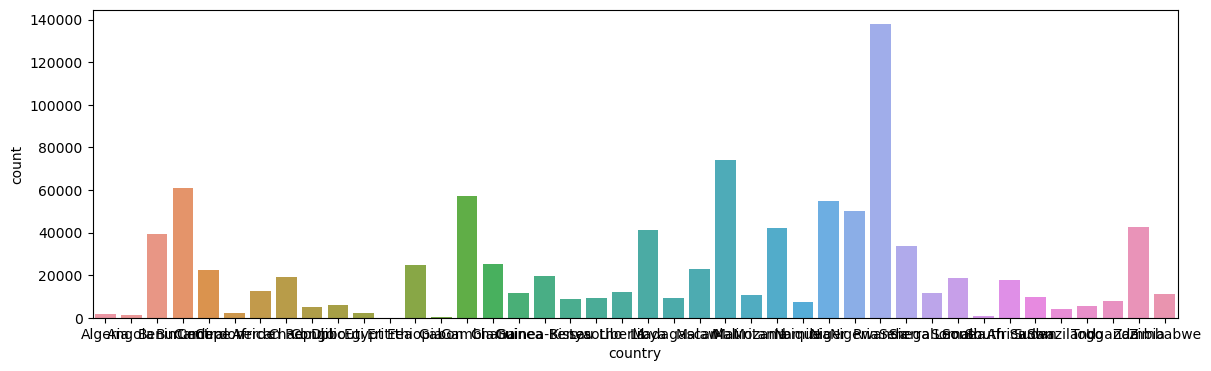

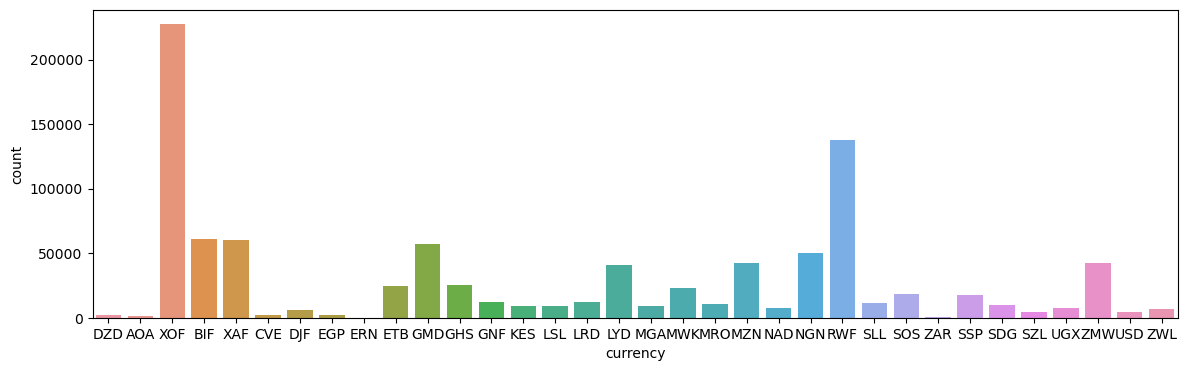

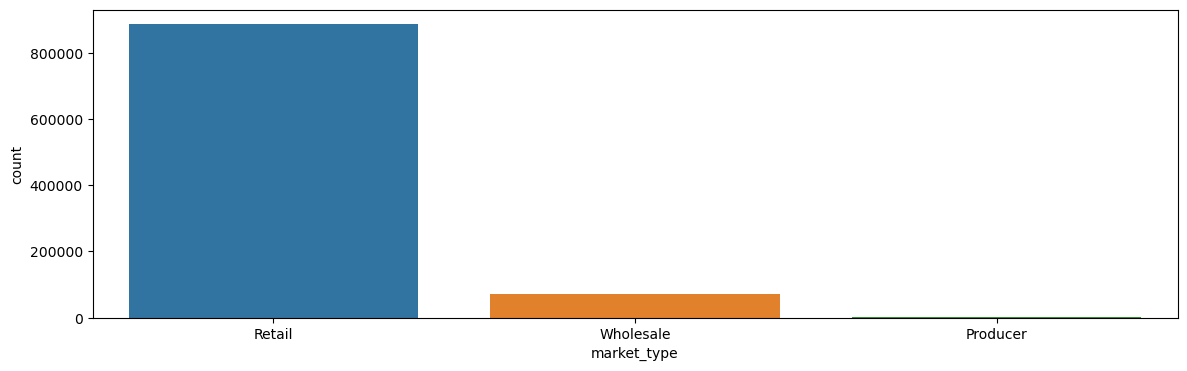

In [19]:
for col in food.select_dtypes(include='object').columns:
    if col not in ['locality','market','produce']:
        plt.figure(figsize=(14,4))
        sns.countplot(data=food, x=col)
        plt.show()  

## Pandas Groupby

In [20]:
wholesale_grp = food.groupby('market_type').get_group('Wholesale')

In [21]:
wholesale_grp

,country,locality,market,produce,currency,market_type,goods_purchased,month,year,price
3065,Benin,Alibori,Malanville (CBM),Maize - Wholesale,XOF,Wholesale,5,1,2002,145.00
3066,Benin,Alibori,Malanville (CBM),Maize - Wholesale,XOF,Wholesale,5,1,2003,106.00
3067,Benin,Alibori,Malanville (CBM),Maize - Wholesale,XOF,Wholesale,5,2,2003,107.50
3068,Benin,Alibori,Malanville (CBM),Maize - Wholesale,XOF,Wholesale,5,3,2003,95.00
3069,Benin,Alibori,Malanville (CBM),Maize - Wholesale,XOF,Wholesale,5,4,2003,95.00
...,...,...,...,...,...,...,...,...,...,...
902012,Uganda,Lira,Lira,Plantains - Wholesale,UGX,Wholesale,5,7,2018,1062.50
902013,Uganda,Lira,Lira,Plantains - Wholesale,UGX,Wholesale,5,8,2018,910.00
902014,Uganda,Lira,Lira,Plantains - Wholesale,UGX,Wholesale,5,9,2018,900.00
902015,Uganda,Lira,Lira,Plantains - Wholesale,UGX,Wholesale,5,10,2018,983.33


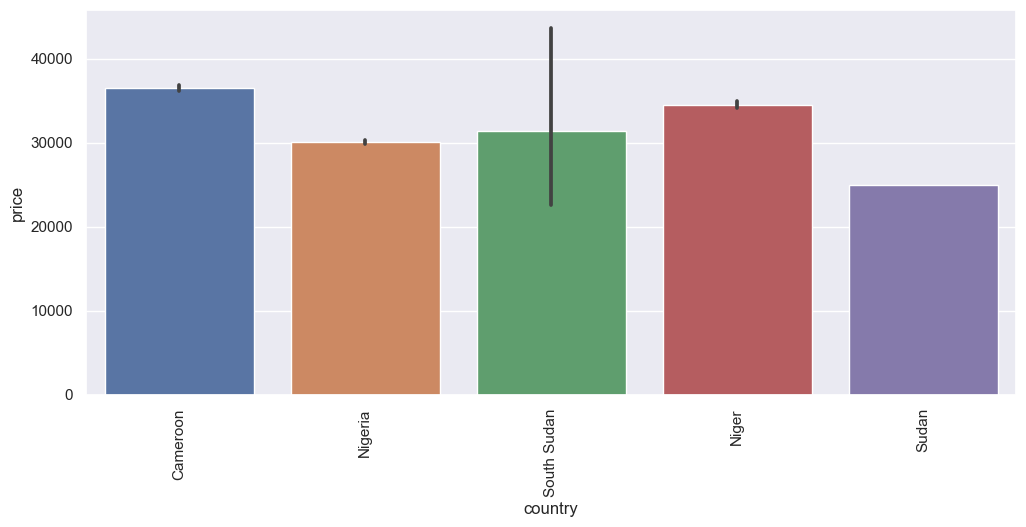

In [22]:
# top 100 Wholesalers


temp_food = wholesale_grp.nlargest(n=10000, columns='price')
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style('darkgrid')
sns.barplot(data=temp_food,x='country',y='price')
plt.xticks(rotation=90)
plt.show()

# RESEACH QUESTIONS

#### Q1. WHICH COUNTRY PRODUCES RICE?

In [23]:
food.head()

,country,locality,market,produce,currency,market_type,goods_purchased,month,year,price
0,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,5,4,2015,90.0
1,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,5,5,2015,96.0
2,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,5,6,2015,96.0
3,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,5,7,2015,83.0
4,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,5,8,2015,80.0


In [24]:
# Filter the dataset to include only rows related to rice
rice_data = food[food['produce'] == 'Rice - Retail']

In [25]:
# Extract unique countries that produce rice
rice_producing_countries = rice_data['country'].unique()

In [26]:
# Display the list of countries
print(rice_producing_countries)

['Algeria' 'Cameroon' 'Central African Republic' 'Egypt' 'Ethiopia'
 'Gabon' 'Kenya' 'Lesotho' 'Libya' 'Malawi' 'Mozambique' 'Namibia'
 'Rwanda' 'South Sudan' 'Swaziland' 'Zimbabwe']


#### Q2. WHAT ARE THE TRENDS IN GLOBAL FOOD PRICES OVER THE PAST DECADE?

In [27]:
food['year'] = pd.to_numeric(food['year'], errors='coerce').astype(int)

In [28]:
food.dtypes

country             object
locality            object
market              object
produce             object
currency            object
market_type         object
goods_purchased      int64
month                int64
year                 int32
price              float64
dtype: object

In [29]:
food['year'] = food['year'].astype(np.int64)

In [30]:
print(food.columns)

Index(['country', 'locality', 'market', 'produce', 'currency', 'market_type',
       'goods_purchased', 'month', 'year', 'price'],
      dtype='object')


In [31]:
unique_year = food['year'].unique()

In [32]:
print(unique_year)

[2015 2016 2008 2009 2010 2011 2012 2013 2014 2017 2018 2019 2020 2002
 2003 2005 2006 2007 2021 2004 2000 2001 1994 1995 1996 1997 1998 1999
 1992 1993 1990 1991]


In [33]:
food["year"] = food["year"].astype(str)

In [58]:
# Filter the dataset for the past decade

food_past_decade = food[food.index.year >= 2011]

In [59]:
# Group by year and item, then calculate the average price

average_prices = food_past_decade.groupby(['year', 'produce'])['price'].mean().unstack()

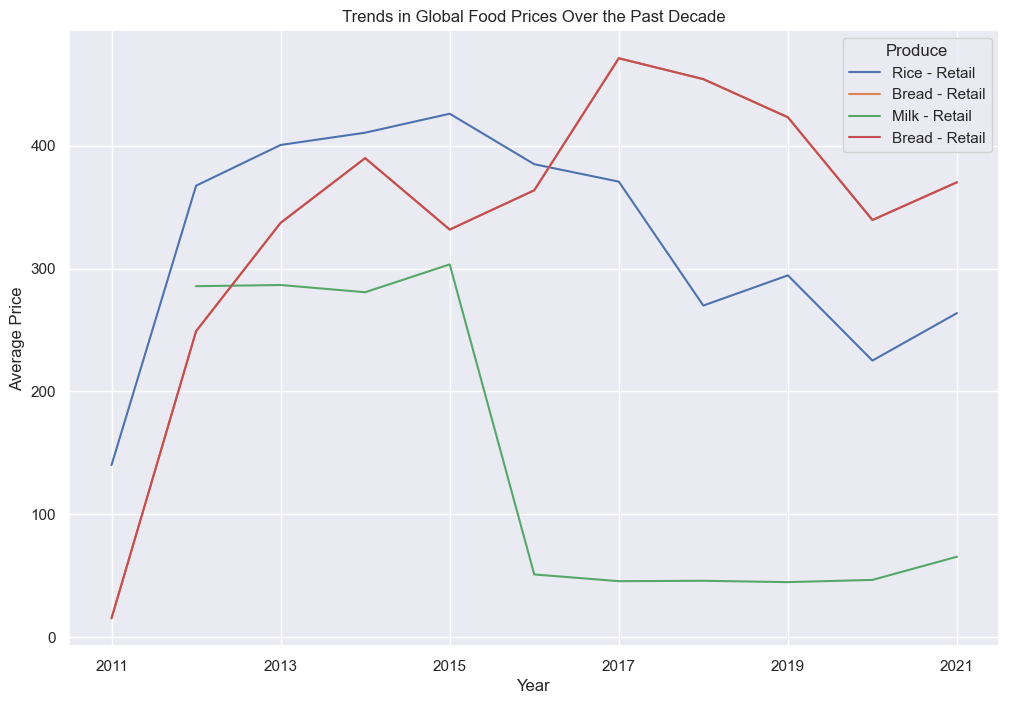

In [60]:
selected_produce = ['Rice - Retail', 'Bread - Retail', 'Milk - Retail', 'Bread - Retail']  # Adjusted based on the dataset
average_prices[selected_produce].plot(figsize=(12, 8))
plt.title('Trends in Global Food Prices Over the Past Decade')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Produce')
plt.grid(True)
plt.show()

#### Q3. HOW DO FOOD PRICES VARY ACROSS DIFFERENT REGIONS AND COUNTRIES?

In [37]:
# Group by region or country and calculate average food prices
# For example, grouping by country and calculating mean food prices
average_prices = food.groupby('country')['price'].mean()

In [38]:
# Display the average prices for each country or region
print(average_prices)

country
Algeria                        164.961907
Angola                        1038.963442
Benin                          612.744978
Burundi                       2516.897501
Cameroon                     12194.504486
Cape Verde                      87.230546
Central African Republic       980.444644
Chad                          6402.038909
Congo                         1461.473620
Djibouti                       802.733808
Egypt                           19.291319
Eritrea                       2272.000000
Ethiopia                      1219.600790
Gabon                          691.063492
Gambia                          56.864125
Ghana                          106.865747
Guinea                       10879.303370
Guinea-Bissau                  877.138516
Kenya                         1191.952042
Lesotho                         33.346925
Liberia                       1273.684710
Libya                            5.647125
Madagascar                    2549.656122
Malawi                    

<Axes: title={'center': 'Average Food Prices by Country'}, xlabel='country', ylabel='Average Price'>

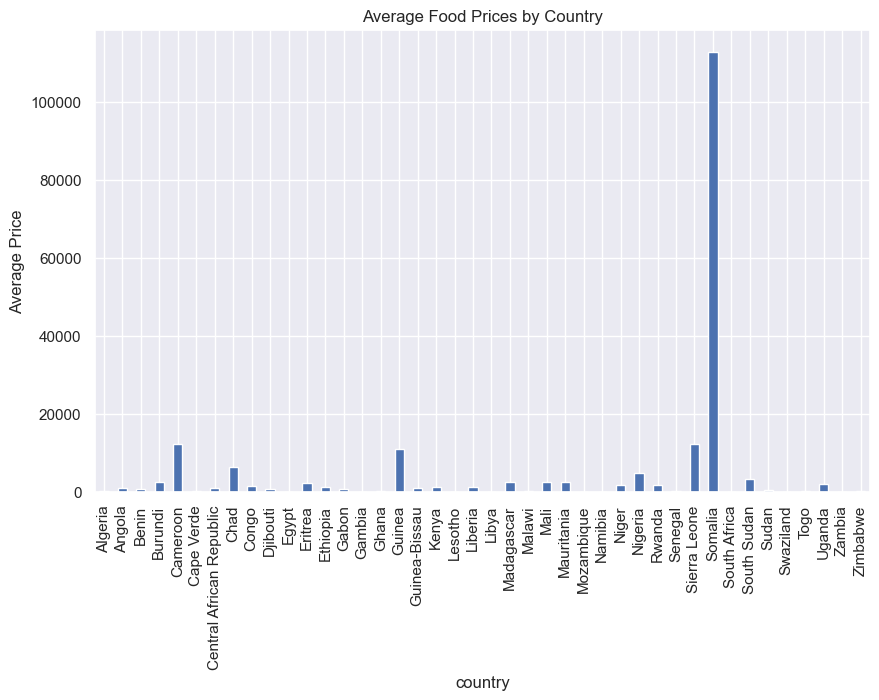

In [39]:
# Visualize the variation in food prices using a bar chart
average_prices.plot(kind='bar', figsize=(10, 6), ylabel='Average Price', title='Average Food Prices by Country')

#### Q4. WHAT IS THE CONSUMER PREFERENCES & THE FOOD PRICE ELASTICITY?

In [40]:
print("Summary Statistics:")
print(food[['price', 'goods_purchased']].describe())

Summary Statistics:
              price  goods_purchased
count  9.567790e+05    956779.000000
mean   4.128833e+03        14.017183
std    1.381840e+05        24.437728
min    0.000000e+00         5.000000
25%    6.500000e+01         5.000000
50%    2.505714e+02         5.000000
75%    7.221005e+02         9.000000
max    1.725000e+07       175.000000


In [41]:
# Compute price elasticity of demand

price_change = (food['price'].max() - food['price'].min()) / food['price'].mean()
quantity_change = (food['goods_purchased'].max() - food['goods_purchased'].min()) / food['goods_purchased'].mean()
price_elasticity = quantity_change / price_change
print("Price Elasticity of Demand:", price_elasticity)

Price Elasticity of Demand: 0.002902862392908923


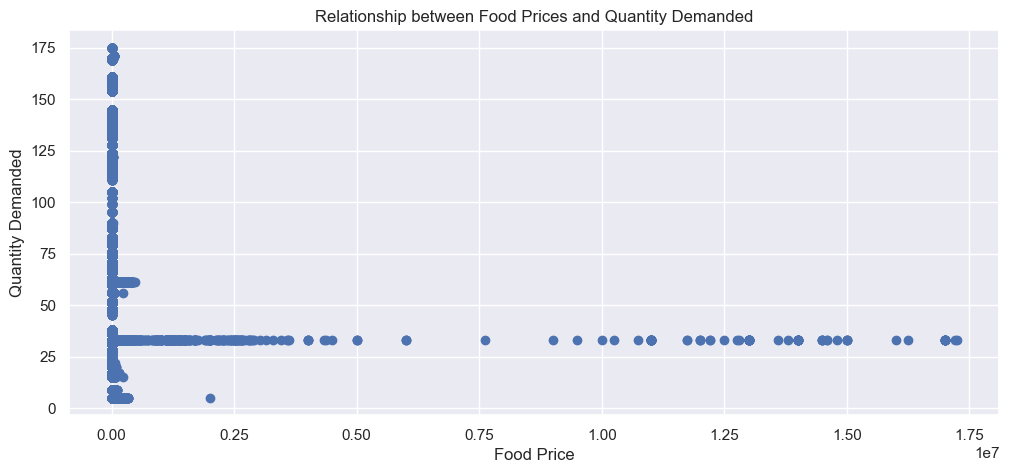

In [42]:
# Visualize the relationship between food prices and quantities demanded

plt.scatter(food['price'], food['goods_purchased'])
plt.xlabel('Food Price')
plt.ylabel('Quantity Demanded')
plt.title('Relationship between Food Prices and Quantity Demanded')
plt.show()

#### Q5. WHAT IS THE SEASONAL TRENDS IN FOOD PRICES?

In [43]:

food['date'] = pd.to_datetime(food['year'].astype(str) + '-' + food['month'].astype(str), format='%Y-%m')


In [44]:
# Rename the 'date' column to 'date_year_month'
food.rename(columns={'date': 'date_year_month'}, inplace=True)

In [50]:
# Set the 'date' column as the index of the DataFrame
food.set_index('date_year_month', inplace=True)

# Verify the index is a DatetimeIndex
print(food.index)

DatetimeIndex(['2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01',
               ...
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01'],
              dtype='datetime64[ns]', name='date_year_month', length=956779, freq=None)


In [52]:
food.dtypes

country             object
locality            object
market              object
produce             object
currency            object
market_type         object
goods_purchased      int64
month                int64
year                object
price              float64
sales              float64
dtype: object

In [53]:
# Add a 'sales' column (assuming it's the quantity sold)
food['sales'] = food['price'] * food['goods_purchased']

In [54]:
food.head()

,country,locality,market,produce,currency,market_type,goods_purchased,month,year,price,sales
date_year_month,,,,,,,,,,,
2015-04-01,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,5,4,2015,90.0,450.0
2015-05-01,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,5,5,2015,96.0,480.0
2015-06-01,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,5,6,2015,96.0,480.0
2015-07-01,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,5,7,2015,83.0,415.0
2015-08-01,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,5,8,2015,80.0,400.0


In [55]:
# Resample the data to monthly frequency and calculate the mean price for each month

monthly_prices = food['price'].resample('M').mean()


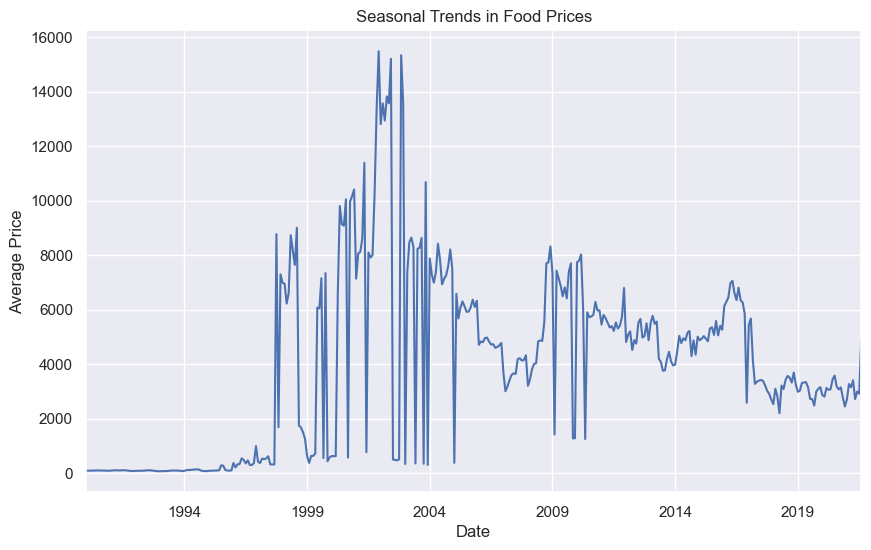

In [56]:
# Plot the data using a line plot

plt.figure(figsize=(10, 6))
monthly_prices.plot()
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Seasonal Trends in Food Prices')
plt.grid(True)
plt.show()

#### Q6. WHICH COUNTRY HAS THE HIGHEST SALES?

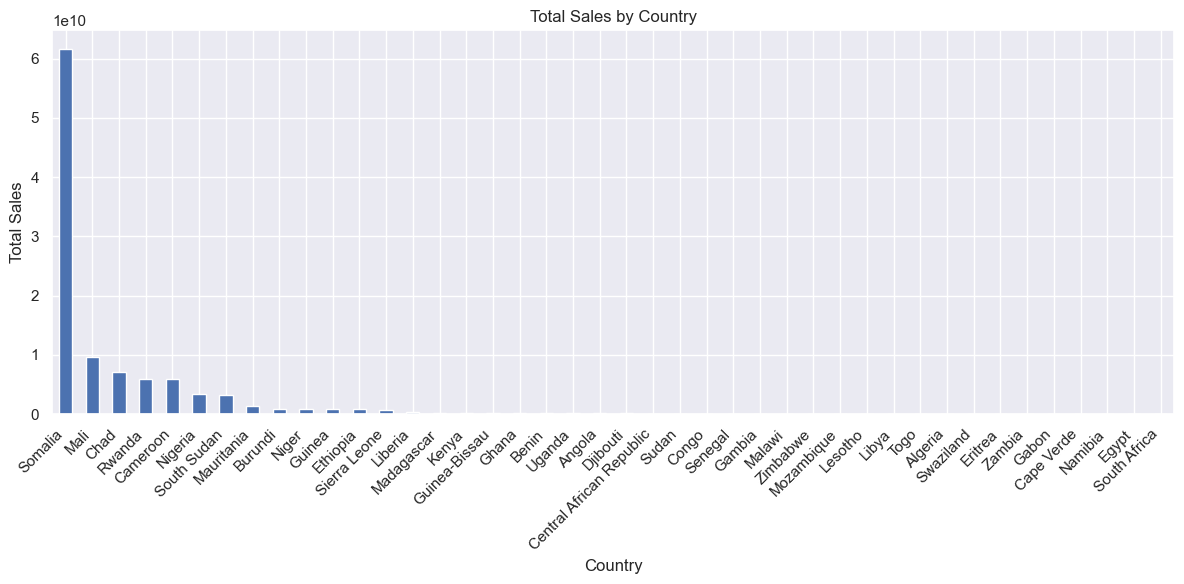

In [57]:
# Group data by country and calculate total sales for each country
total_sales_by_country = food.groupby('country')['sales'].sum().sort_values(ascending=False)

# Plot the data using a bar chart
plt.figure(figsize=(12, 6))
total_sales_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Sales by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()